In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from keras.models import load_model

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
model = load_model("model.h5")

In [3]:
valid_df = pd.read_csv("valid_df.csv")

In [4]:
val_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [5]:
val_images = val_generator.flow_from_dataframe(
    dataframe=valid_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 404 validated image filenames belonging to 15 classes.


In [6]:
# Predict the label of the test_images
pred = model.predict(val_images)
pred = np.argmax(pred, axis=1)

# Map the label
labels = (val_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

13/13 [==============================] - 4s 225ms/step
The first 5 predictions: ['JAVA SPARROW', 'JAVA SPARROW', 'BLACK THROATED HUET', 'REGENT BOWERBIRD', 'SURF SCOTER']


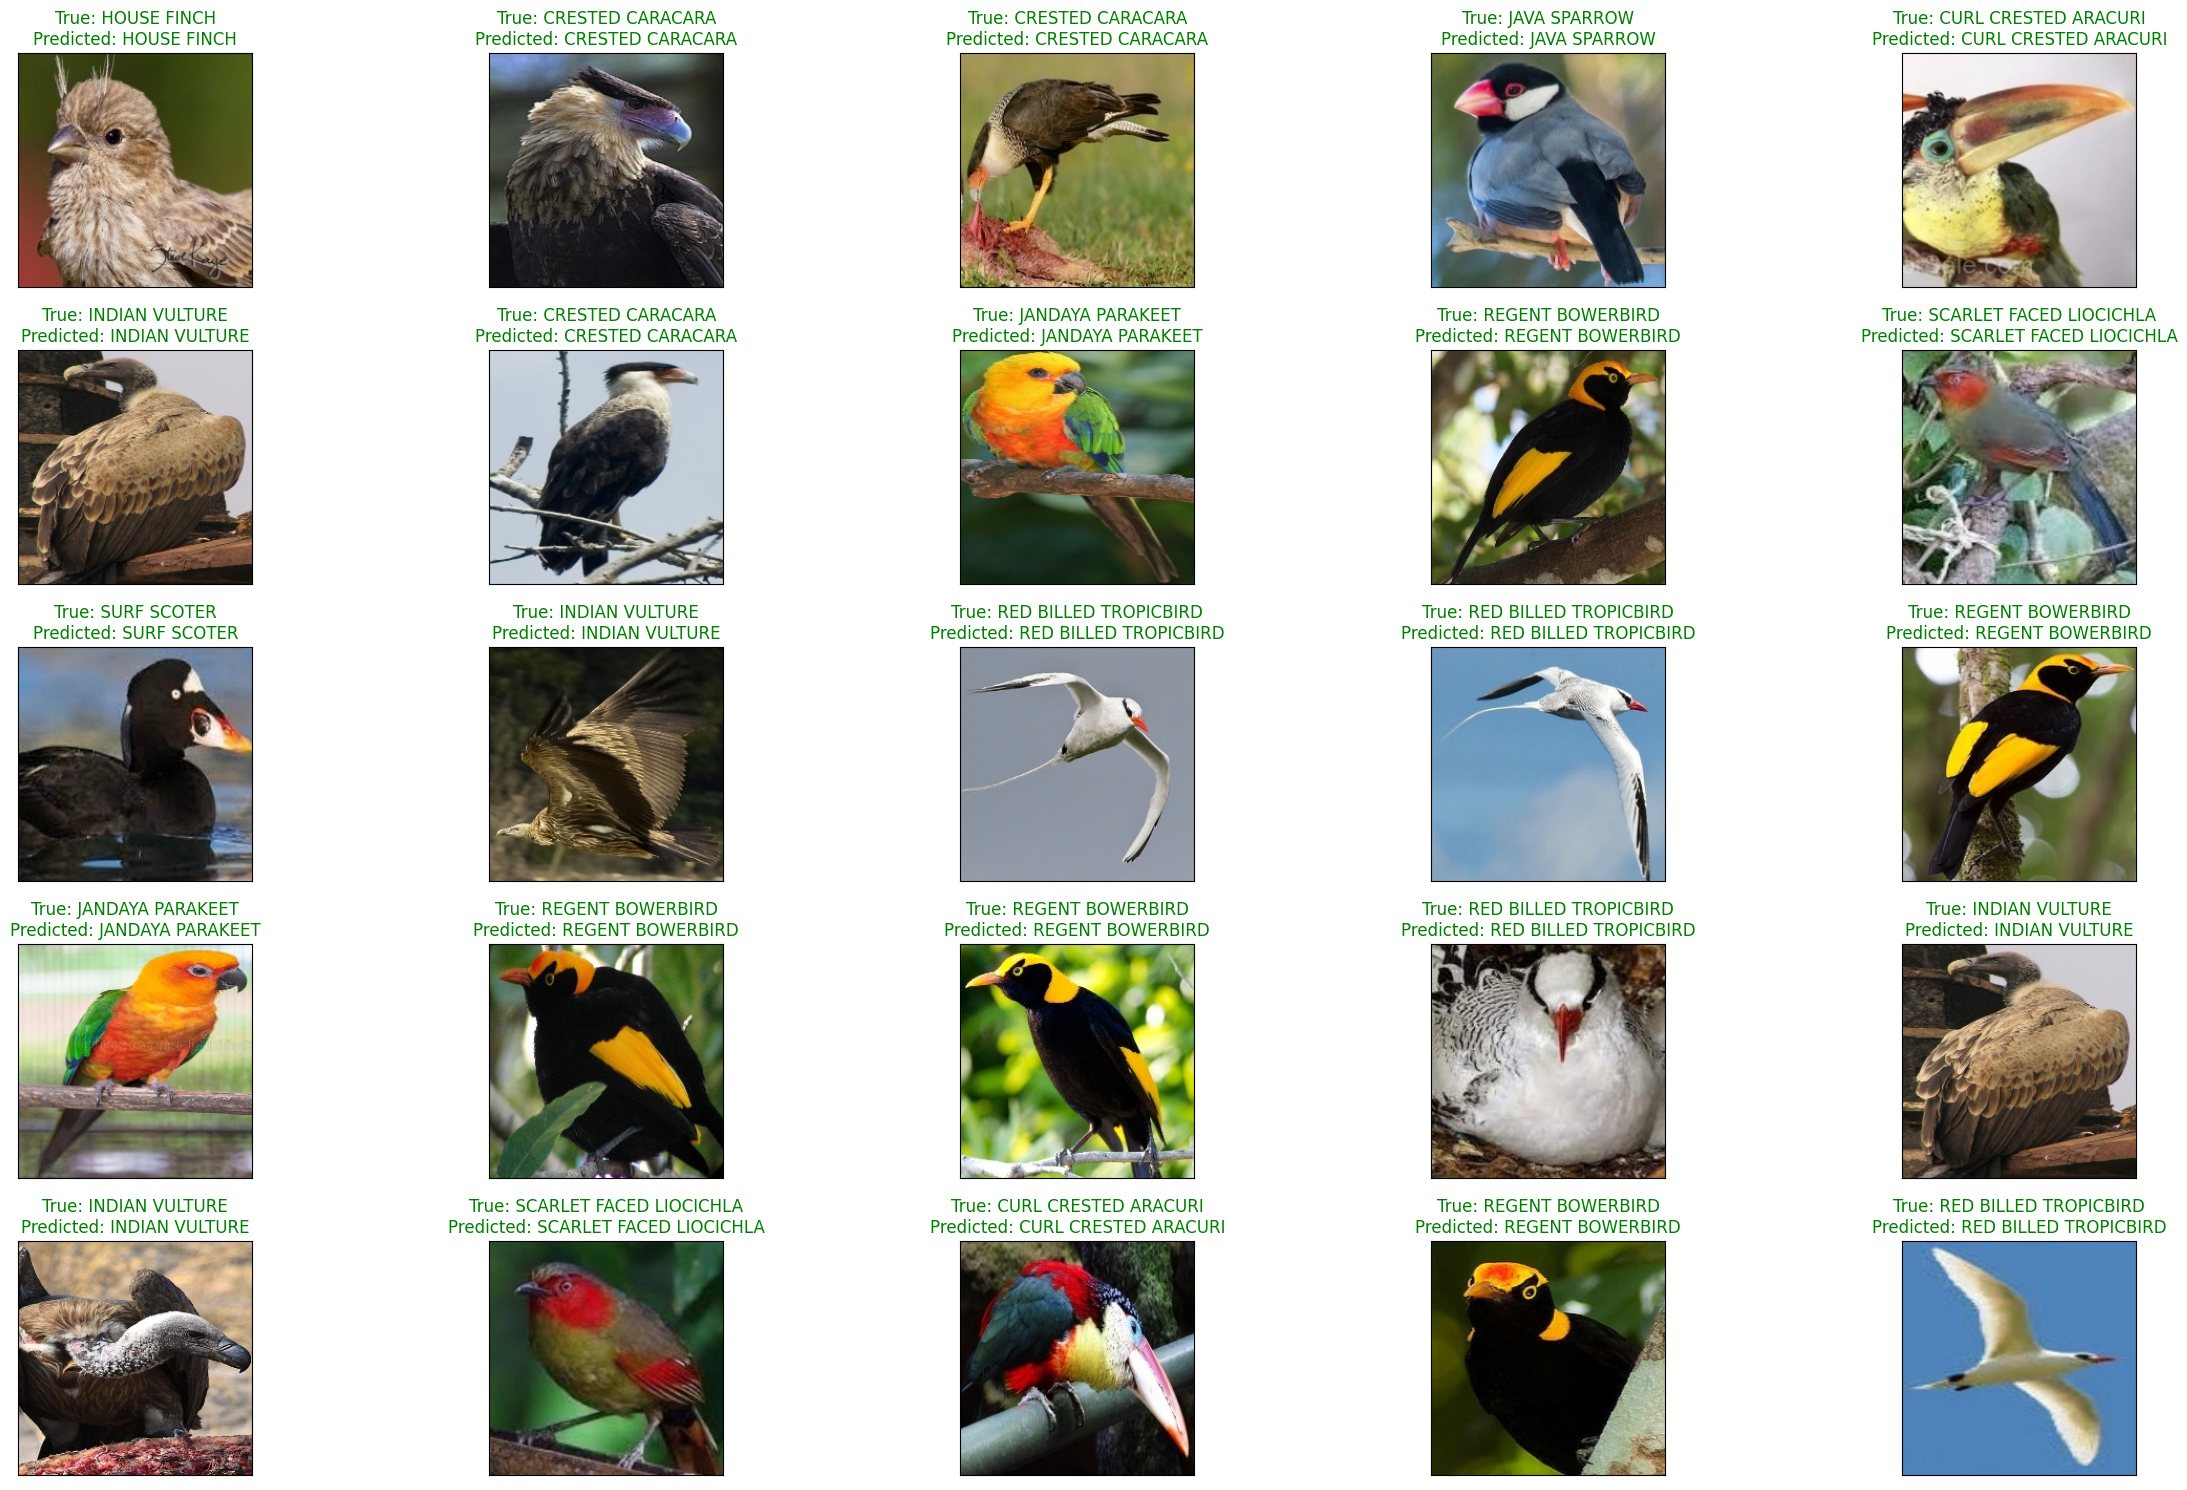

In [7]:
# Display 25 random pictures from the test dataset with their true and predicted labels
random_index = np.random.randint(0, len(valid_df) - 1, 25)
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(valid_df.Filepath.iloc[random_index[i]]))
    if valid_df.Label.iloc[random_index[i]] == pred[random_index[i]]:
        color = "green"
    else:
        color = "red"
    ax.set_title(f"True: {valid_df.Label.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}", color=color)
plt.tight_layout()

In [8]:
print("Classification Report")
y_test = list(valid_df.Label)
report = classification_report(y_test, pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df

Classification Report


,precision,recall,f1-score,support
BLACK THROATED HUET,1.000000,1.000000,1.000000,16.00000
BLUE DACNIS,1.000000,1.000000,1.000000,24.00000
CHIPPING SPARROW,0.952381,1.000000,0.975610,20.00000
CRESTED CARACARA,1.000000,1.000000,1.000000,29.00000
CURL CRESTED ARACURI,1.000000,1.000000,1.000000,24.00000
HIMALAYAN MONAL,1.000000,1.000000,1.000000,21.00000
HORNED SUNGEM,1.000000,1.000000,1.000000,24.00000
HOUSE FINCH,1.000000,0.947368,0.972973,38.00000
INDIAN VULTURE,1.000000,1.000000,1.000000,30.00000
JANDAYA PARAKEET,1.000000,1.000000,1.000000,23.00000


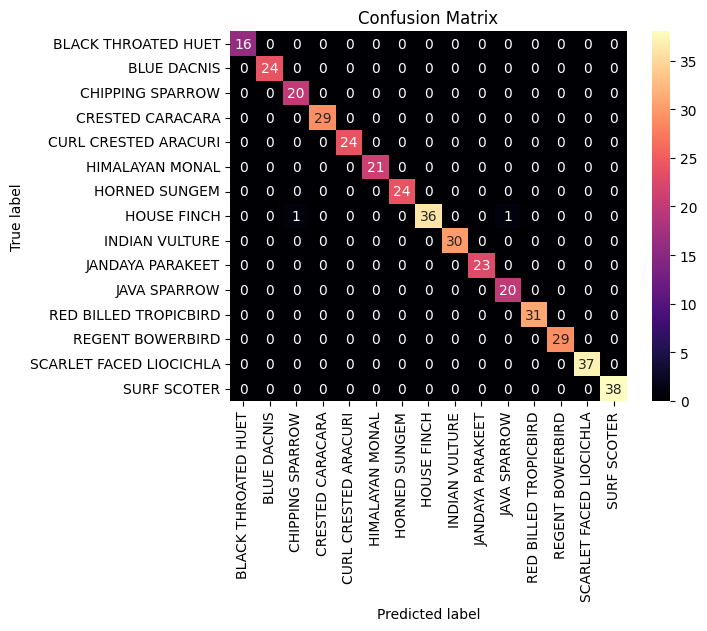

In [9]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, cmap='magma')
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks(np.arange(15)+0.5, labels=list(labels.values()), rotation=90)
plt.yticks(np.arange(15)+0.5, labels=list(labels.values()), rotation=0);